In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Loading data 
train_data = datasets.MNIST(root='data', train=True, transform=transforms)
test_data = datasets.MNIST(root='data', train=False, transform=transforms)

In [95]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: <module 'torchvision.transforms' from '/Users/mahnoorakhter/opt/anaconda3/lib/python3.9/site-packages/torchvision/transforms/__init__.py'>

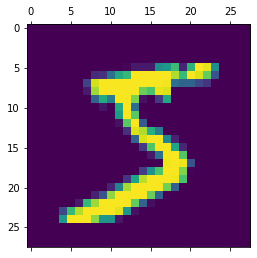

In [96]:
plt.matshow(train_data.data[0])

In [97]:
train_data.targets[0]

tensor(5)

In [98]:
X_train = train_data.data
X_test = test_data.data

In [99]:
y_train = train_data.targets
y_test = test_data.targets

In [100]:
y_train[9]

tensor(4)

In [101]:
y_test[0]

tensor(7)

In [102]:
#Scaling data
X_train_scaled = X_train/225
X_test_scaled = X_test/225

In [103]:
X_train_scaled[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [104]:
len(X_train)

60000

In [105]:
# Flattening
X_train_flattened = X_train.view(len(X_train), 28*28)
X_train_flattened.shape

torch.Size([60000, 784])

In [106]:
X_test_flattened = X_test.view(len(X_test), 28*28)
X_test_flattened.shape

torch.Size([10000, 784])

In [107]:
X_train_scaled_flattened = X_train_scaled.view(len(X_train), 28*28)
X_test_scaled_flattened = X_test_scaled.view(len(X_test), 28*28)

In [108]:
# Defining a Simple NN Model

class SimpleNNModel(nn.Module):
    def __init__(self, in_ft=784, out_ft=10):
        super().__init__()
        
        self.fc = nn.Linear(in_ft, out_ft)
        
    def forward(self, x):
        x = F.sigmoid(self.fc(x))
        return x        

In [109]:
model = SimpleNNModel()

In [110]:
model.parameters

<bound method Module.parameters of SimpleNNModel(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)>

In [111]:
# Defining Loss criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [112]:
type(X_train_flattened)

torch.Tensor

In [113]:
epochs = 5
batch_size = 10

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i in range(0, len(X_train_flattened), batch_size):
        inputs = X_train_flattened[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs.to(torch.float32))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(X_train_flattened)
    epoch_accuracy = correct / total

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")


Epoch 1/5, Loss: 0.1694837930202484, Accuracy: 0.7280166666666666
Epoch 2/5, Loss: 0.15879607231219608, Accuracy: 0.8609166666666667
Epoch 3/5, Loss: 0.15767815540830293, Accuracy: 0.86965
Epoch 4/5, Loss: 0.15696815064549446, Accuracy: 0.8807333333333334
Epoch 5/5, Loss: 0.15680308977365492, Accuracy: 0.8799333333333333
